In [11]:
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
from preprocess import preprocess, compute_dataset_statistics, save_data
from tools import read_yaml_config

config_file_path = 'configs/config_kate.yaml'
species = 'whaleshark_full'
config = read_yaml_config(config_file_path, species)
print(config)

anno_path = config["raw_annotation_path"]


images_dir = config["images_dir"]
csv_dir = config['csv_dir']
csv_column_names = config['csv_column_names']
merge_cols = config['merge_cols']
output_path = config['preprocessed_annotation_path']

data=preprocess(anno_path, images_dir, csv_dir, csv_column_names, merge_cols)
compute_dataset_statistics(data)


{'data_dir': '/home/kate/data/coco_whaleshark/full_images/whaleshark.coco', 'export_dir': '/home/kate/data/coco_whaleshark/full_images/whaleshark.coco/split', 'images_dir': '/home/kate/data/coco_whaleshark/full_images/whaleshark.coco/images/train2020', 'raw_annotation_path': '/home/kate/data/coco_whaleshark/full_images/whaleshark.coco/annotations/instances_train2020.json', 'preprocessed_annotation_path': '/home/kate/data/coco_whaleshark/full_images/whaleshark.coco/preprocessed/whaleshark.json', 'excluded_viewpoints': [], 'csv_dir': 'None', 'csv_column_names': ['annotation_uuid', 'viewpoint_y'], 'merge_cols': ['annotation_uuid', 'viewpoint_y']}
Dataset Statistics:
Number of annotations: 7693
Number of images: 7693
Number of individuals: 543
Number of individual viewpoints: 1134
Number of categories: 1

Annotations per Category:
rhincodon_typus: 7693

Annotations per Viewpoint:
back: 313
left: 4292
right: 3088

Max images per name: 154
Min images per name: 1
Average images per name: 14.1

In [ ]:
# # Run this if you have 3 input jsons
# import pandas as pd
# from preprocess import preprocess, compute_dataset_statistics, save_data
# from tools import read_yaml_config

# config_file_path = 'configs/config_kate.yaml'
# species = 'whaleshark_full'
# config = read_yaml_config(config_file_path, species)
# print(config)

# anno_path_train = config["raw_annotation_path"]
# anno_path_test = config["raw_annotation_path_test"]
# anno_path_val = config["raw_annotation_path_val"]

# images_dir = config["images_dir"]
# csv_dir = config['csv_dir']
# csv_column_names = config['csv_column_names']
# merge_cols = config['merge_cols']
# output_path = config['preprocessed_annotation_path']

# data_train=preprocess(anno_path_train, images_dir, csv_dir, csv_column_names, merge_cols)
# compute_dataset_statistics(data_train)

# data_test=preprocess(anno_path_test, images_dir, csv_dir, csv_column_names, merge_cols)
# compute_dataset_statistics(data_test)

# data_val=preprocess(anno_path_val, images_dir, csv_dir, csv_column_names, merge_cols)
# compute_dataset_statistics(data_val)

# data =  pd.concat([data_train, data_val, data_test])

In [8]:

# data['file_name'] = data.apply(lambda row: row['file_path'].split('/')[-1], axis=1)

In [4]:
save_data(data, output_path)

Data is saved to: /home/kate/data/coco_whaleshark/full_images/whaleshark.coco/preprocessed/whaleshark.json


,bbox,theta,viewpoint,segmentation,segmentation_bbox,area,iscrowd,id_x,image_id,category_id,...,flickr_url,id_y,uuid_y,image_uuid,id,name_category,supercategory,species,path,individual_uuid
0,"[18.0, 582.0, 2412.0, 1248.0]",0.0,right,"[[18, 582, 2430, 582, 2430, 1830, 18, 1830, 18...","[18, 582, 2412, 1248]",3010176,0,1,1,0,...,None,1,4e246669-87cd-a1d8-759c-de54cae7c75c,4d7086b1-fe5e-4cdb-bfdb-d9a6ef7ca774,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,9b4113a1-fd6e-44b7-8647-5129db2c2b5f
1,"[510.89918256130795, 237.0572207084469, 2386.9...",0.0,left,"[[511, 237, 2898, 237, 2898, 1512, 511, 1512, ...","[511, 237, 2387, 1275]",3043425,0,2,2,0,...,None,2,8b63bb08-be01-be92-cec2-a0696bd0b4e2,96a9a1e6-279b-496d-91d9-3b81476a8eb8,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,baef9ccd-62f7-4dc3-97a7-1e4084bfcd2a
2,"[316.6118421052631, 627.4671052631578, 2196.54...",0.0,left,"[[317, 627, 2513, 627, 2513, 1459, 317, 1459, ...","[317, 627, 2196, 832]",1827072,0,3,3,0,...,None,3,6d30d0a5-73b9-2ac2-7cdd-8222f108838c,2be2c4ba-bd33-40fd-9ca6-49851cb7fb3b,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,b67a3327-1e21-49b2-814f-69f62a2a004f
3,"[78.14269535673839, 6.795016987542469, 2898.07...",0.0,left,"[[78, 7, 2976, 7, 2976, 2013, 78, 2013, 78, 7]]","[78, 7, 2898, 2006]",5813388,0,4,4,0,...,None,4,6765ec00-7301-5fb5-08fa-a2ddeece4abc,9a465f2b-f42e-4af8-8149-896ebc3e9549,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,5d8605e9-5c7d-49df-b779-fe790ab40e22
4,"[198.01980198019803, 414.4271570014144, 2787.8...",0.0,left,"[[198, 414, 2986, 414, 2986, 1975, 198, 1975, ...","[198, 414, 2788, 1561]",4352068,0,5,5,0,...,None,5,0018e1a5-dc0f-8e6a-887b-03733759c485,2238913a-f775-47c9-80df-8ce059fb08de,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,2b8da797-889b-4b0f-9929-dedcde0f93b1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,"[0.0, 254.16666666666669, 2995.8333333333335, ...",0.0,left,"[[0, 254, 2996, 254, 2996, 2425, 0, 2425, 0, 2...","[0, 254, 2996, 2171]",6504316,0,7689,7689,0,...,None,7689,6245a5f1-c22c-0107-f746-f0ab06ba26ba,81bd3400-6418-46d1-b396-6f45df8ba9d2,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,7f4185a0-8e40-4cde-a3c5-602734cf0a7d
7689,"[623.8479262672811, 478.68663594470047, 2120.3...",0.0,back,"[[624, 479, 2744, 479, 2744, 1991, 624, 1991, ...","[624, 479, 2120, 1512]",3205440,0,7690,7690,0,...,None,7690,6a7f0ce4-36dd-a0af-e2b8-43f273960034,390cd682-bf8a-42aa-bce3-502bba57e4b0,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,38864c19-9ef2-403d-b7d9-b72f10286959
7690,"[0.0, 191.66666666666669, 2916.666666666667, 2...",0.0,right,"[[0, 192, 2917, 192, 2917, 2383, 0, 2383, 0, 1...","[0, 192, 2917, 2191]",6391147,0,7691,7691,0,...,None,7691,6098585f-9e27-6790-2036-d792dd4ecbcd,cbd20f2f-3d7a-4caf-8124-74cc85687884,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,c1ba764f-dc53-420e-89f6-124ad89951f3
7691,"[52.734375, 287.109375, 2941.40625, 2091.796875]",0.0,left,"[[53, 287, 2994, 287, 2994, 2379, 53, 2379, 53...","[53, 287, 2941, 2092]",6152572,0,7692,7692,0,...,None,7692,06496880-e05f-9b62-8d4d-7f982a377686,01b2e185-f894-4f10-820c-8ae1d7dda015,0,rhincodon_typus,animal,rhincodon_typus,/home/kate/data/coco_whaleshark/full_images/wh...,49fcefe2-4380-405e-bcfa-217a5084ac9c


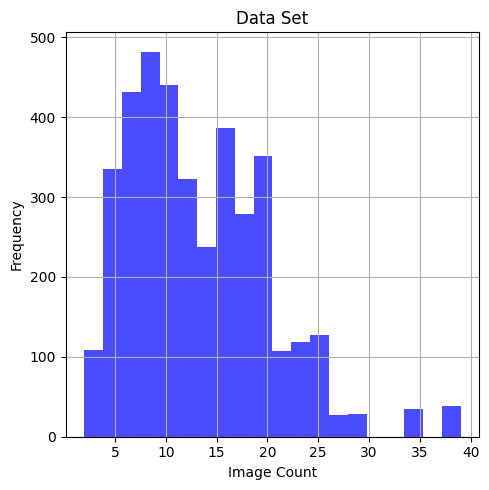

In [72]:
from tools import add_image_count

# Add 'image_count" column
data = add_image_count(data, 'name')

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

# Plot histograms for each DataFrame in a separate subplot
data['image_count'].hist(ax=axes, bins=20, color='blue', alpha=0.7)
axes.set_title('Data Set')
axes.set_xlabel('Image Count')
axes.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()